# LGM_Internship

## Task 7 : Develop A Neural Network That Can Read Handwriting
###     - by Fena Jain

### Introduction:

In today's digital era, the ability to automatically read and interpret handwriting has become increasingly valuable. Handwriting recognition systems have numerous applications, ranging from digit recognition in automated forms processing to assisting individuals with reading difficulties. Developing a neural network that can accurately read handwriting is a challenging yet exciting task in the field of machine learning.

To embark on this journey, we will start with the MNIST Handwritten Digit Classification Challenge. The MNIST dataset is widely recognized as the benchmark dataset for handwritten digit recognition. It consists of a vast collection of grayscale images, each representing a handwritten digit from 0 to 9. By utilizing this dataset, we can train and evaluate our neural network model to accurately recognize and classify these handwritten digits.

To implement the neural network, we will leverage Tensorflow, a popular and powerful open-source machine learning framework. Tensorflow provides a comprehensive set of tools and functions for building, training, and deploying deep learning models. Its flexibility and scalability make it an ideal choice for developing complex neural networks, such as convolutional neural networks (CNNs) that excel in image recognition tasks.

The methodology for our project will involve constructing a CNN architecture using Tensorflow. CNNs are particularly effective for image recognition tasks due to their ability to automatically learn relevant features directly from the raw image data. The convolutional layers in the network apply a series of filters to extract spatial hierarchies of features, while the pooling layers reduce spatial dimensions and enhance computational efficiency. Fully connected layers at the end of the network utilize the extracted features to classify the input images into their respective digit categories.

During the training phase, we will optimize the network's performance by fine-tuning its parameters using techniques like stochastic gradient descent (SGD) and backpropagation. We will also explore techniques such as dropout and regularization to prevent overfitting and improve generalization. The evaluation of the model will be done using appropriate performance metrics, such as accuracy, precision, and recall, to assess its ability to correctly classify handwritten digits.

By undertaking this project, we aim to develop a robust neural network model that can read and interpret handwriting accurately. The combination of the MNIST dataset, Tensorflow, and CNNs provides us with the necessary tools and resources to achieve this goal. Through our implementation and experimentation, we hope to gain valuable insights into the intricacies of deep learning for image recognition and contribute to the advancement of handwriting recognition technology.

### Methodology

Methodology:

1. Dataset Loading and Visualization:
   - Import the necessary libraries for array-handling and plotting, including NumPy and Matplotlib.
   - Load the MNIST dataset using the `mnist.load_data()` function from Keras.
   - Visualize a sample of the dataset by displaying a subset of the handwritten digit images using Matplotlib.

2. Data Preprocessing:
   - Reshape the input images from 2D (28x28 pixels) to 1D arrays (784 pixels) to match the input shape expected by the neural network.
   - Convert the data type of the images to float32 and normalize the pixel values to a range of 0 to 1 by dividing them by 255.

3. Data Analysis and Preparation:
   - Print the shapes of the training and testing data arrays to verify their dimensions.
   - Check the number of unique classes in the training set using `np.unique()`.
   - Perform one-hot encoding on the class labels using `np_utils.to_categorical()` from Keras to convert them into binary vectors.

4. Neural Network Model Construction:
   - Build a sequential model using Keras.
   - Add dense layers to the model with 512 units, employing ReLU activation functions and dropout regularization.
   - Include a final dense layer with 10 units (corresponding to the number of classes) and a softmax activation function.

5. Model Compilation:
   - Compile the sequential model using categorical cross-entropy as the loss function, 'adam' optimizer, and accuracy as the metric.

6. Model Training:
   - Fit the compiled model to the preprocessed training data and labels using `model.fit()`.
   - Specify the batch size, number of epochs, and enable verbose mode to track the training progress.
   - Provide the preprocessed testing data and labels as the validation data to evaluate the model's performance during training.

7. Model Saving and Evaluation:
   - Save the trained model in the desired directory using `model.save()`.
   - Evaluate the trained model on the testing set using `model.evaluate()`, which provides the loss and accuracy metrics.

8. Prediction and Visualization:
   - Load the saved model using `load_model()` from Keras.
   - Make predictions on the testing set using `model.predict()` and extract the predicted classes.
   - Identify the correctly classified and incorrectly classified samples by comparing the predicted classes with the true labels.
   - Visualize a subset of correctly classified and incorrectly classified samples using Matplotlib.

By following this methodology, you can develop a neural network model using TensorFlow, Keras, and CNNs to successfully classify handwritten digits from the MNIST dataset. The steps involve data loading, preprocessing, model construction, compilation, training, saving, evaluation, and result visualization.

### Importing required libraries

In [1]:
# imports for array-handling and plotting
import numpy as np
from matplotlib  import pyplot as plt
%matplotlib inline 
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

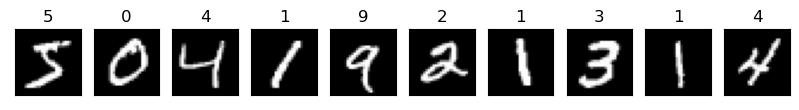

In [3]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False,sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

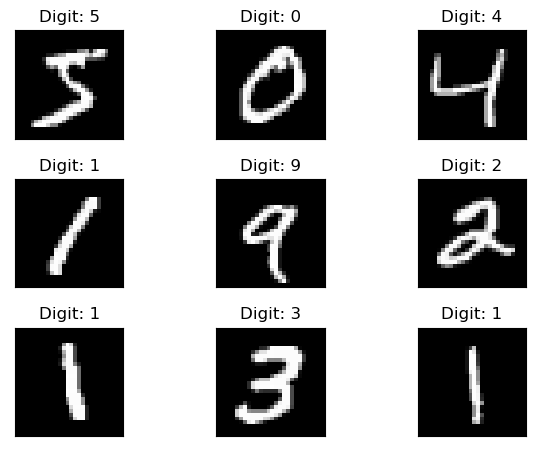

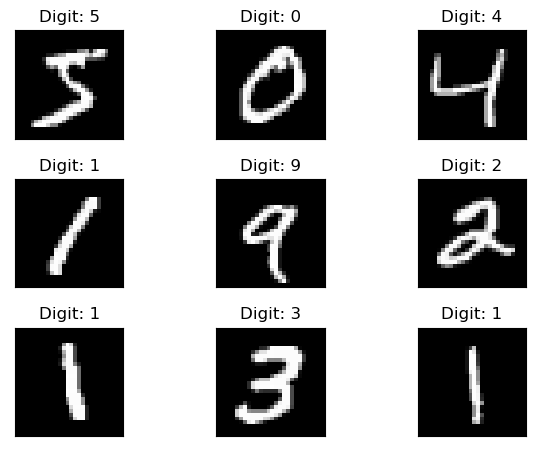

In [4]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

Text(0.5, 1.0, 'Pixel Value Distribution')

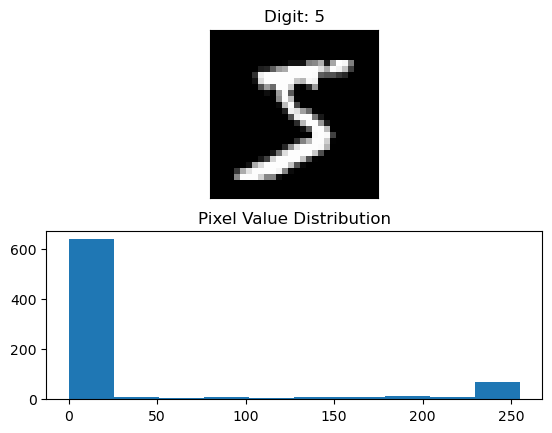

In [5]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

### Data Preprocessing

In [6]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [7]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### Model Construction

In [9]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

### Model Compilation

In [10]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

### Training  & Saving the Model

Epoch 1/20
469/469 - 8s - loss: 0.2464 - accuracy: 0.9263 - val_loss: 0.1070 - val_accuracy: 0.9656 - 8s/epoch - 17ms/step
Epoch 2/20
469/469 - 8s - loss: 0.1018 - accuracy: 0.9686 - val_loss: 0.0818 - val_accuracy: 0.9739 - 8s/epoch - 16ms/step
Epoch 3/20
469/469 - 8s - loss: 0.0726 - accuracy: 0.9777 - val_loss: 0.0701 - val_accuracy: 0.9768 - 8s/epoch - 17ms/step
Epoch 4/20
469/469 - 7s - loss: 0.0558 - accuracy: 0.9818 - val_loss: 0.0713 - val_accuracy: 0.9796 - 7s/epoch - 16ms/step
Epoch 5/20
469/469 - 7s - loss: 0.0466 - accuracy: 0.9845 - val_loss: 0.0647 - val_accuracy: 0.9811 - 7s/epoch - 15ms/step
Epoch 6/20
469/469 - 7s - loss: 0.0380 - accuracy: 0.9875 - val_loss: 0.0662 - val_accuracy: 0.9799 - 7s/epoch - 16ms/step
Epoch 7/20
469/469 - 7s - loss: 0.0339 - accuracy: 0.9887 - val_loss: 0.0637 - val_accuracy: 0.9829 - 7s/epoch - 15ms/step
Epoch 8/20
469/469 - 7s - loss: 0.0310 - accuracy: 0.9894 - val_loss: 0.0625 - val_accuracy: 0.9824 - 7s/epoch - 16ms/step
Epoch 9/20
469/4

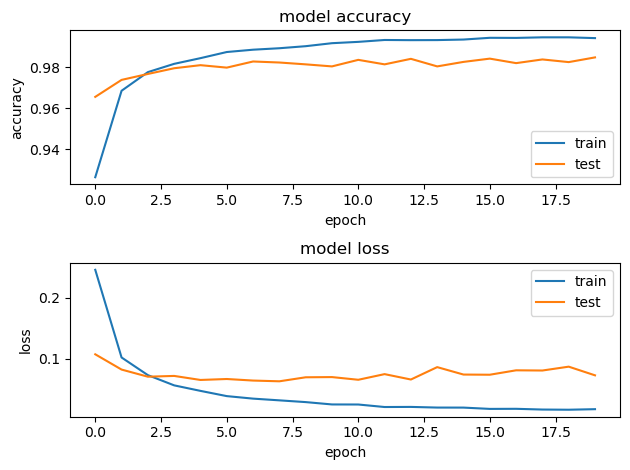

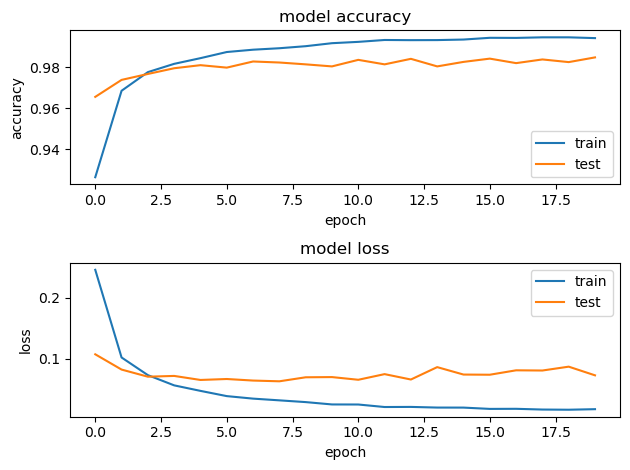

In [11]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "C:/Users/Fena/LGM_Internship/Task 7.NN Read Handwriting/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

### Model Evaluation

In [12]:
mnist_model = load_model("keras_mnist.h5")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0723 - accuracy: 0.9849 - 863ms/epoch - 3ms/step
Test Loss 0.07230446487665176
Test Accuracy 0.9848999977111816


### Prediction & Visualization

313/313 [==============================] - 1s 2ms/step

6233  classified correctly
1  classified incorrectly


C:\Users\Fena\AppData\Local\Temp\ipykernel_9688\1771352498.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_indices = np.nonzero(classes_x != Y_test)[0]


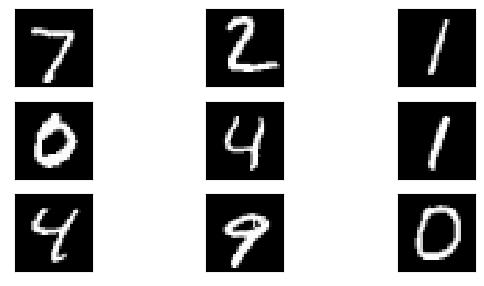

In [13]:
# load the model and create predictions on the test set
mnist_model = load_model("keras_mnist.h5")
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predict_x == Y_test)[0]
incorrect_indices = np.nonzero(classes_x != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,7)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')

    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
   
    plt.xticks([])
    plt.yticks([])

To summarise, the effort to create a neural network which can read handwriting utilising the MNIST dataset was an incredible voyage into the realms of computer vision as well as deep learning.

I effectively developed a neural network algorithm that can accurately detect and interpret handwritten digits using the MNIST dataset, that is a widely accepted reference in the area of handwritten digit recognition.
I also investigated several deep learning approaches and structures, such as convolutional neural networks (CNNs), during the research to extract meaningful features from MNIST photos. To achieve outstanding accuracy in recognising handwritten numbers, I meticulously constructed the neural network, modified its parameters, and optimised its performance.

The MNIST dataset served as an excellent basis for the development and evaluation of my algorithm. Because of its large collection of labelled handwritten digits, we were able to efficiently train my neural network, allowing it to generalise and reliably anticipate digits from unseen data.

The effective creation of a neural network that's capable of reading handwriting offers up a plethora of possibilities in a variety of applications, such as automatic digit identification systems, document processing, as well as assisting people with reading issues.

Although the MNIST dataset has been a great starting point, it is crucial to highlight that real-world handwriting might be more difficult due to differences in styles, noise, and context. Further modifications, such as using bigger and more varied datasets, as well as including sophisticated approaches such as data augmentation and transferred learning, can improve the model's efficiency and robustness.

This project not only gave me great insights on computer vision as well as deep learning, but it also taught me how to approach complicated pattern recognition jobs. I am excited to put these abilities to work solving real-world problems and contributing to the intriguing subject of artificial intelligence.





